# HSE 2022: Mathematical Methods for Data Analysis

## Homework 2

In [3]:
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 2.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 3.0 MB/s eta 0:00:00a 0:00:01


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Dataset from seaborn on diamonds prices.

In [19]:
data = sns.load_dataset('diamonds')

y = data.price
X = data.drop(['price'], axis=1)
columns = data.drop(['price'], axis=1).columns

## Linear regression

#### 0. [0.25 points] Encode categorical variables.

In [20]:
X = pd.get_dummies(X)
X.head()

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


**Using one-hot encoding!**

#### 1. [0.25 points] Split the data into train and test sets with ratio 80:20 with random_state=17.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=17)
y_train = np.array(y_train)
X_train.head()

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
380,0.70,62.8,61.0,5.57,5.61,3.51,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
46949,0.62,63.2,55.0,5.42,5.40,3.42,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
46558,0.51,60.5,63.0,5.17,5.11,3.11,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
51885,0.56,61.5,57.0,5.27,5.34,3.26,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14512,1.35,61.4,57.0,7.10,7.13,4.37,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


#### 2. [1 point] Train models on train data using StatsModels library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.6$

Don't forget to scale the data before training the models with StandardScaler!

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
def train(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_train_pred = model.predict(X_train_scaled)
    
    print(model)
    print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
    print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test R2 = %.4f" % r2_score(y_test, y_pred))
    print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))
    print()
    return model

In [42]:
lr = train(LinearRegression())
ridge = train(Ridge(alpha=0.01))
lasso = train(Lasso(alpha=0.01))
en = train(ElasticNet(alpha=0.01, l1_ratio=0.6))

LinearRegression()
Test RMSE = 1150.1194
Train RMSE = 1125.0181
Test R2 = 0.9183
Train R2 = 0.9201

Ridge(alpha=0.01)
Test RMSE = 1149.9901
Train RMSE = 1124.9250
Test R2 = 0.9183
Train R2 = 0.9201

Lasso(alpha=0.01)
Test RMSE = 1149.9849
Train RMSE = 1124.9251
Test R2 = 0.9183
Train R2 = 0.9201

ElasticNet(alpha=0.01, l1_ratio=0.6)
Test RMSE = 1149.7912
Train RMSE = 1130.0015
Test R2 = 0.9184
Train R2 = 0.9194



#### 3. [1 point] Explore the values of the parameters of the resulting models and compare the number of zero weights in them. Comment on the significance of the coefficients, overal model significance and other related factors from the results table

In [43]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

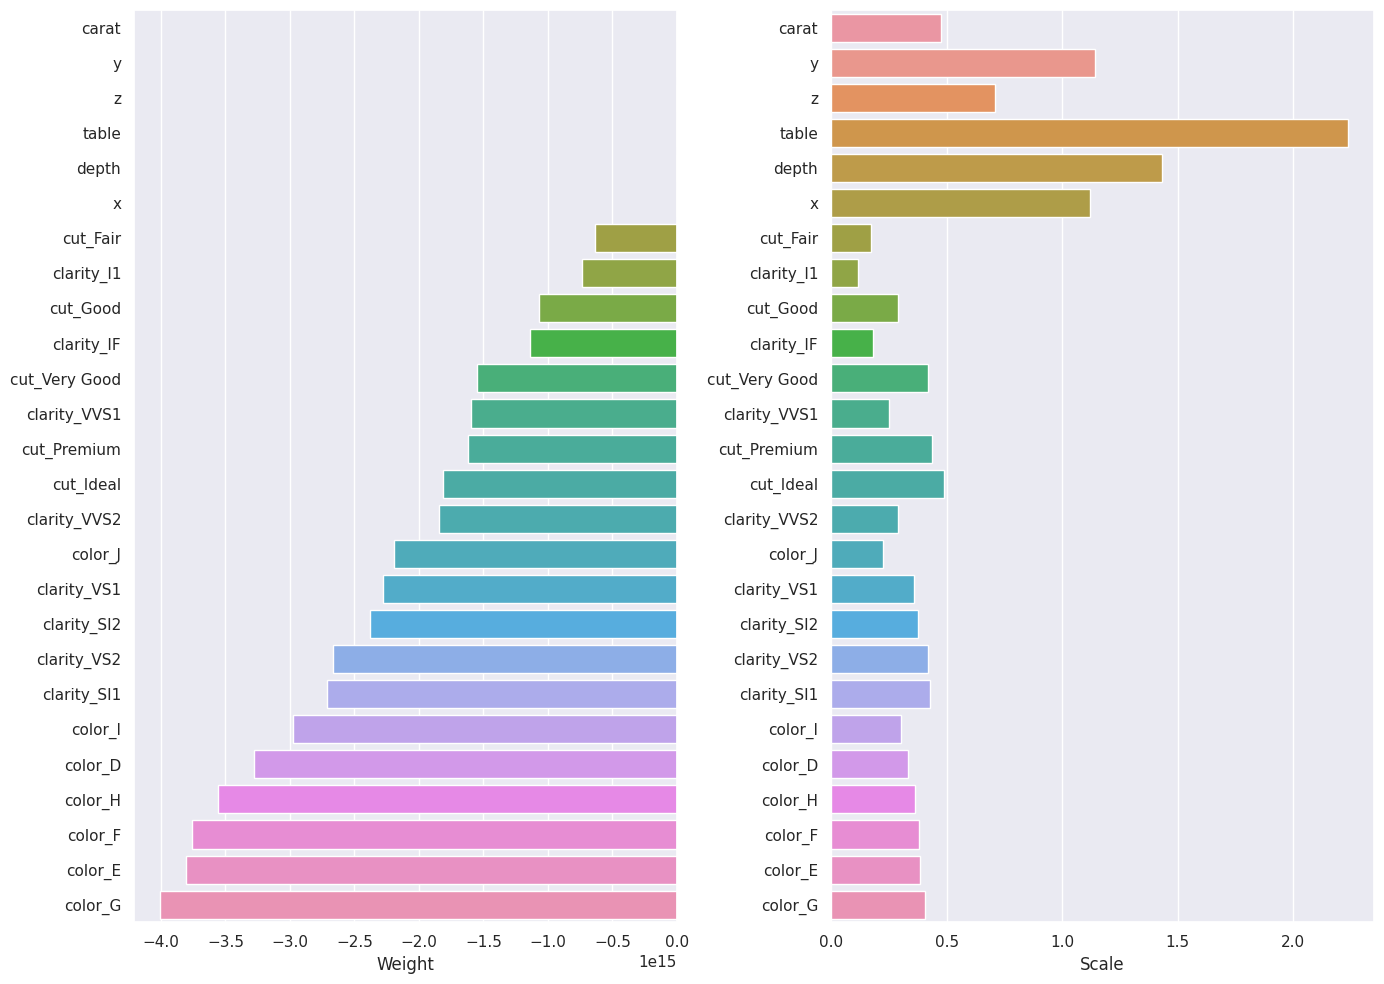

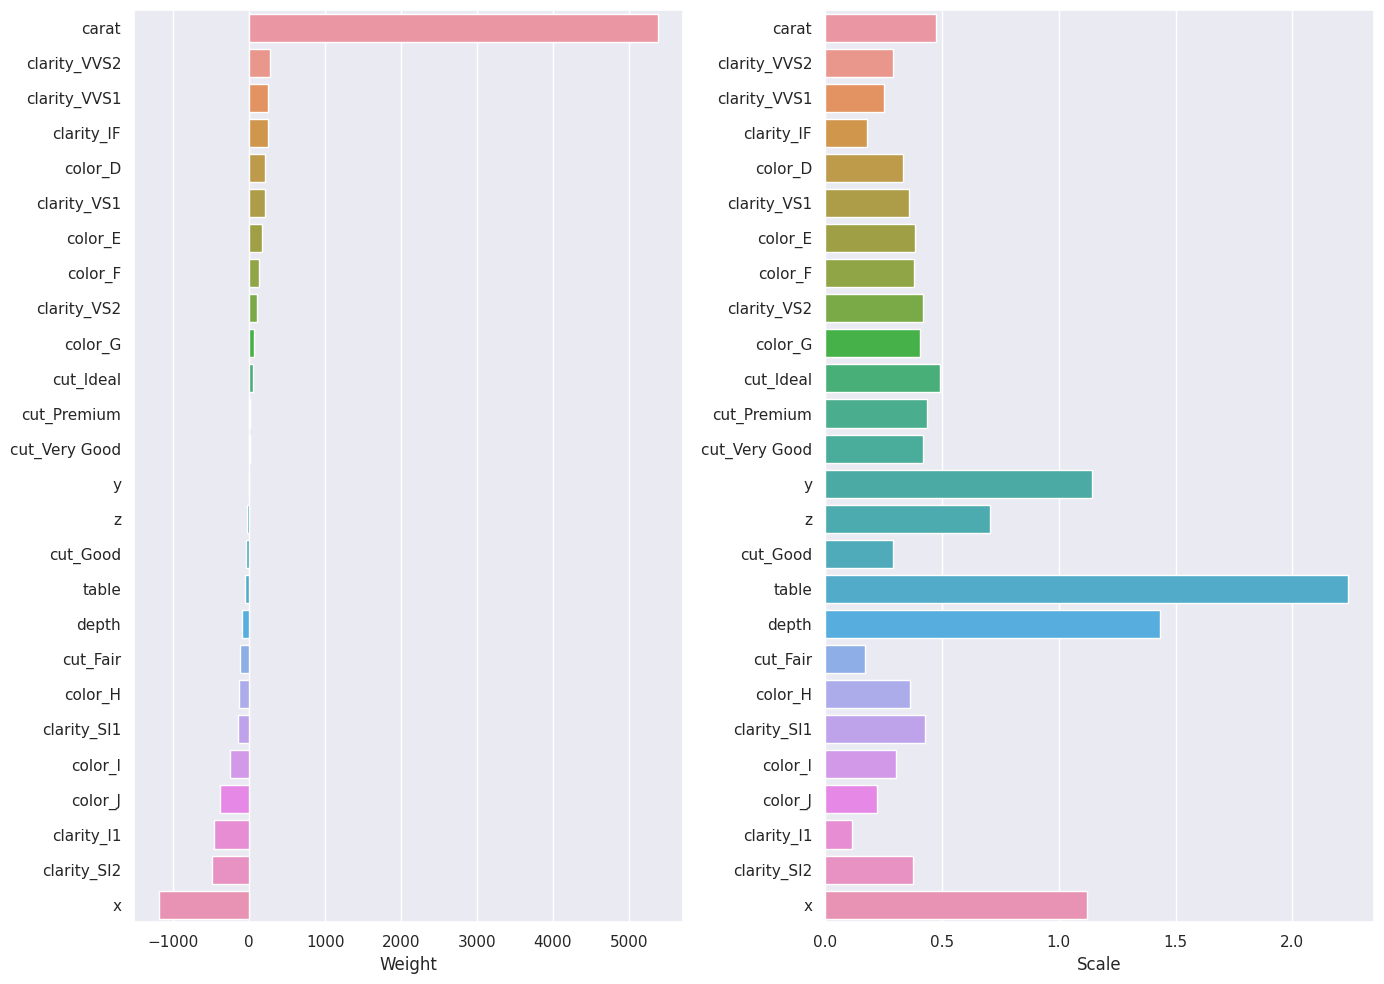

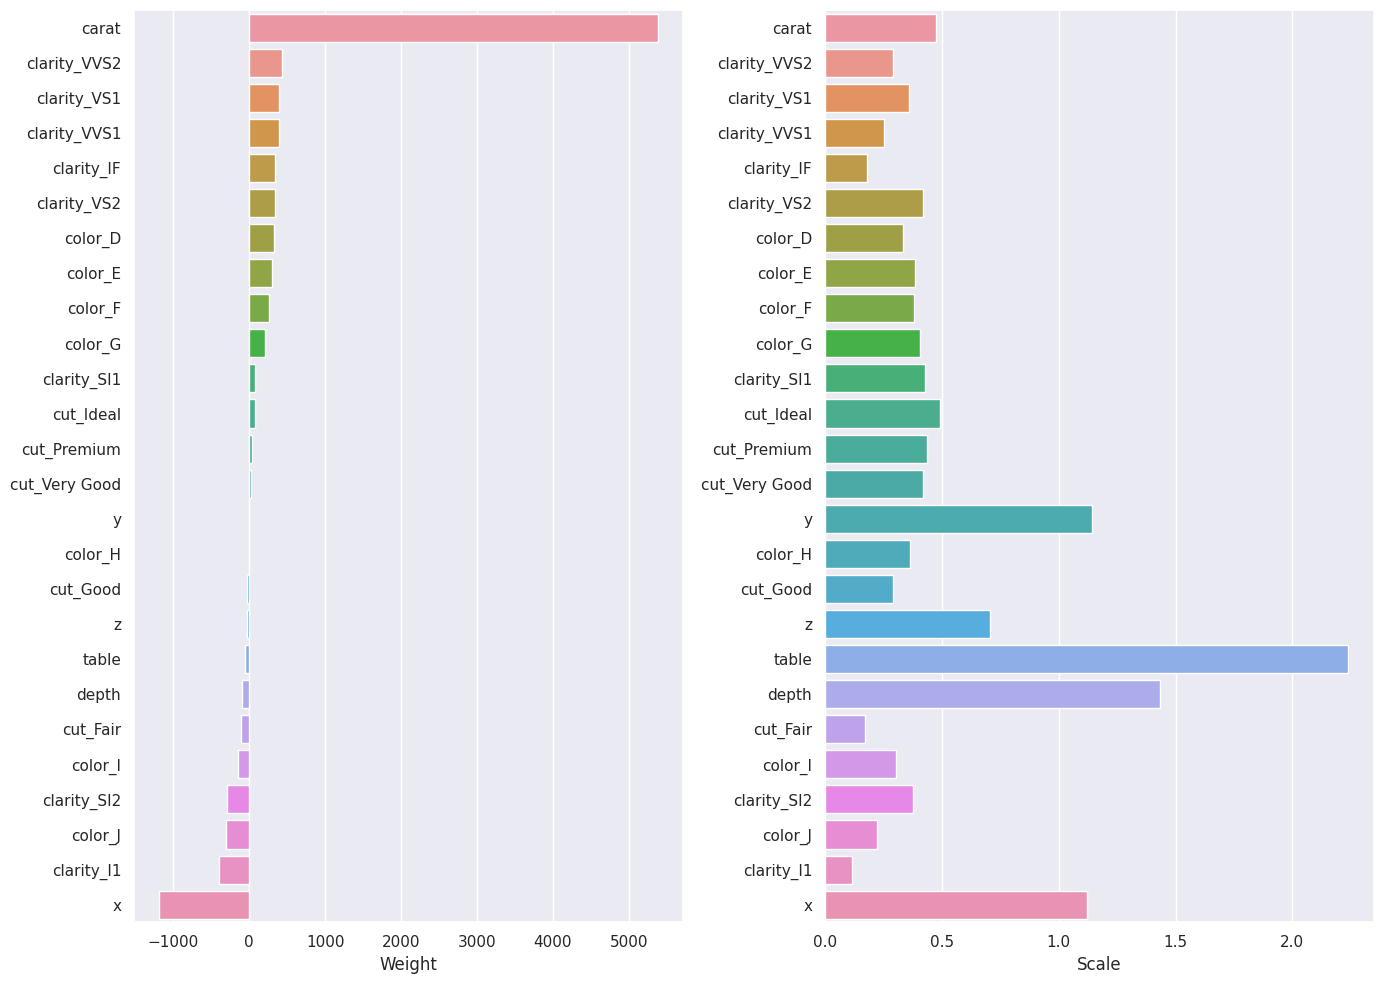

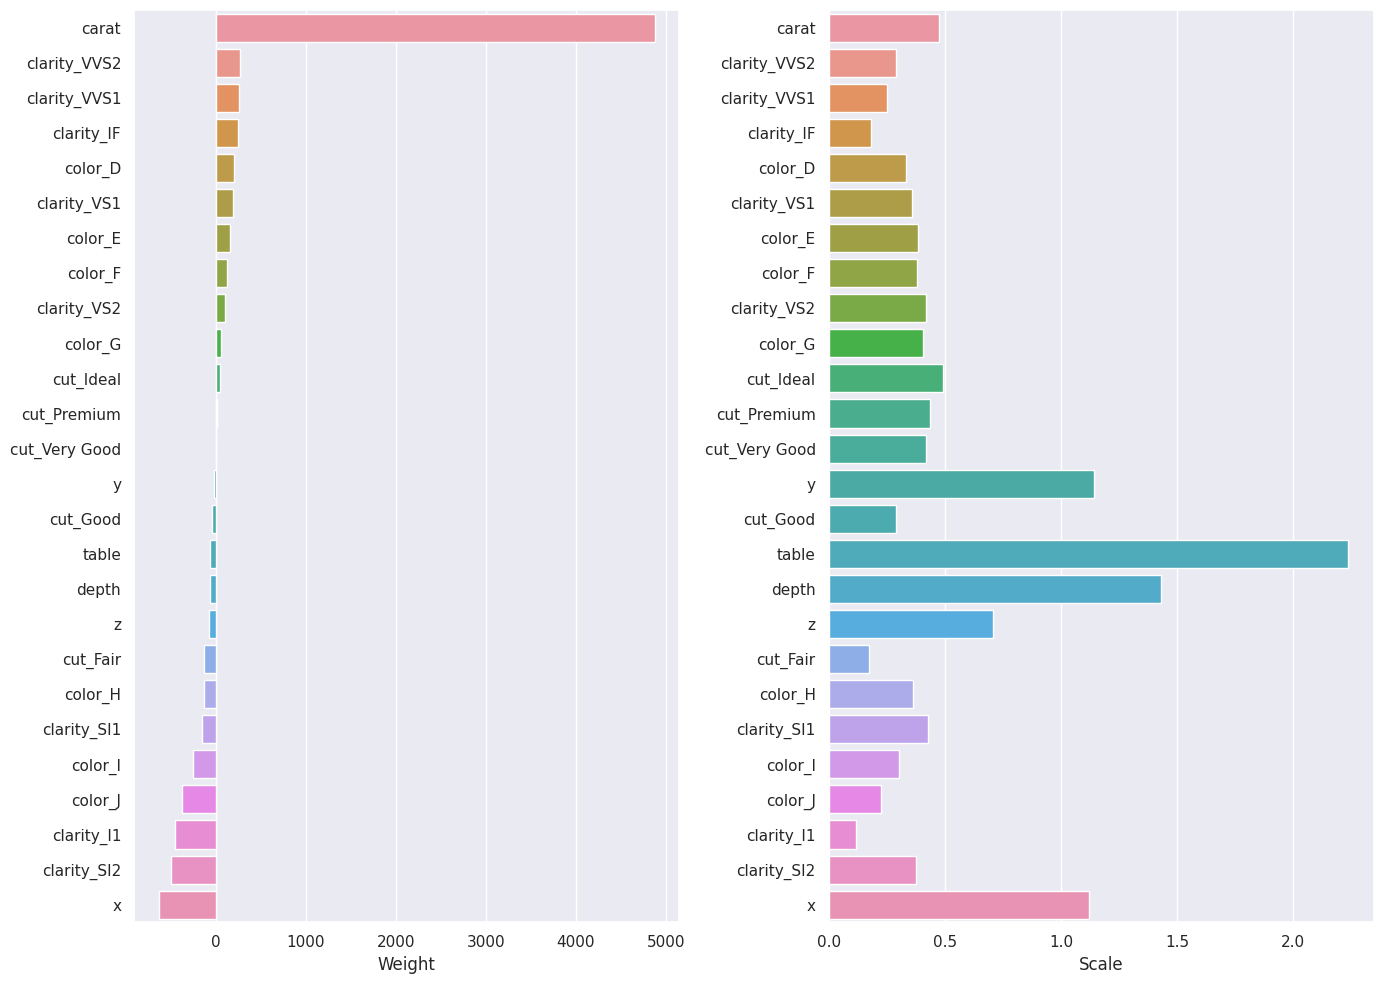

In [44]:
show_weights(X_train.columns, lr.coef_, X_train.std())
show_weights(X_train.columns, ridge.coef_, X_train.std())
show_weights(X_train.columns, lasso.coef_, X_train.std())
show_weights(X_train.columns, en.coef_, X_train.std())

**ATTENTION EXPLANATION**

*Via the built graphics we can find out that the 'cut' feature which split throw one-hot-encoding is not significant as well as 'depth', 'table', 'y', 'z'.*

*The features such as 'clarity' and 'color' have a middle significance*

*'x' feature is more significant than previous.*

*And at the same time the 'carat' variable is very very very significant*

#### 4. [1 point] Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions.

kavo

na lekcyah this wasn't present

just like me

#### 5. [1 point] Find the best (in terms of RMSE) $\alpha$ for Lasso regression using cross-validation with 4 folds. You must select values from range $[10^{-4}, 10^{3}]$.

Best alpha = 3.3446


Text(0, 0.5, 'CV score')

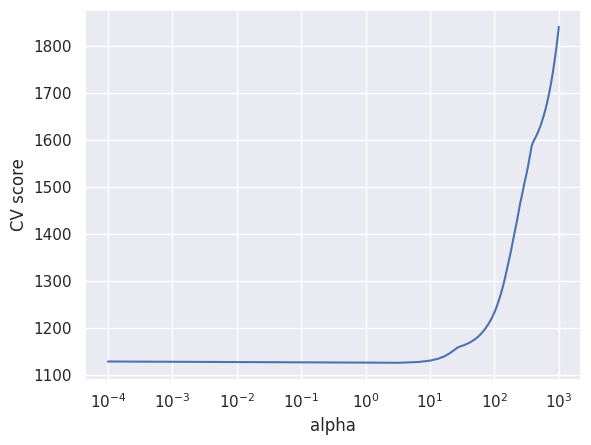

In [45]:
alphas = np.linspace(10**(-4), 10**3, 300)
searcher = GridSearchCV(Lasso(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=4)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

## Gradient descent

#### 6. [3.5 points] Implement a Ridge regression model for the MSE loss function, trained by gradient descent.

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Absolute-value norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$



To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a random vector from normal distribution. The following is a template class that needs to contain the code implementing all variations of the models.

In [68]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, 
                 w0=None, eta=1e-2, alpha=1e-3, 
                 fit_intercept=True, batch_sample=10):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """
        
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.fit_intercept = fit_intercept
        self.batch_sample = batch_sample
    
    def fit(self, X, y, lr=0.01):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        n, k = X.shape

        if self.w is None:
            self.w = np.random.randn(k + 1 if self.fit_intercept else k)
        
        X_train = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X
        
        self.loss_history = []
        
        for iter_num in range(self.max_iter):
            y_pred = self.predict(X)
            self.loss_history.append(self.calc_loss(X, y, y_pred))

            grad = self.calc_gradient(X_train, y)

            assert grad.shape == self.w.shape, f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"
            self.w -= lr * grad

        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
            
        n, k = X.shape
        if len(self.w) != k:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        if self.gd_type == 'GradientDescent':

            lambdaI = self.alpha * np.eye(self.w.shape[0])
            if self.fit_intercept:
                lambdaI[-1, -1] = 0

            grad = 2 * (X.T @ X / X.shape[0] + lambdaI) @ self.w
            grad -= 2 * X.T @ y / X.shape[0]

        elif self.gd_type == 'StochasticDescent':
            inds = np.random.choice(np.arange(X.shape[0]), size=self.batch_sample, replace=False)

            lambdaI = self.alpha * np.eye(self.w.shape[0])
            if self.fit_intercept:
                lambdaI[-1, -1] = 0

            grad = 2 * (X[inds].T @ X[inds] / self.batch_sample + lambdaI) @ self.w
            grad -= 2 * X[inds].T @ y[inds] / self.batch_sample
            
        elif self.gd_type == 'Momentum':
            pass
        elif self.gd_type == 'Adagrad':
            pass
        else:
            raise ValueError("Incorrect input gradient type!")
        
        return grad

    def calc_loss(self, X, y, y_pred):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        return mean_squared_error(y_pred, y)
    
    def get_weights(self):
        return self.w
    
    def get_losses(self):
        return self.loss_history
        


#### 7. [1 points] Train and validate "hand-written" models on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

In [105]:
true_model = Ridge()
f  = true_model.fit(X_train_scaled, y_train)
y_pred = true_model.predict(X_test_scaled)
true_mse = mean_squared_error(y_test, y_pred)

print(f"sklearn MSE: {true_mse}")
print()

my_best = (np.inf, 0, 0)
for max_iter in [10, 100, 500, 1000]:
    for batch_sample in [2, 4, 10, 20, 50, 100]:
        my_model = LinReg(max_iter=max_iter, batch_sample=batch_sample, gd_type='StochasticDescent')
        my_model.fit(X_train_scaled, y_train)
        my_y_pred = my_model.predict(X_test_scaled)
        my_err = mean_squared_error(y_test, my_y_pred)
        my_best = (my_err, max_iter, batch_sample) if my_err < my_best[0] else my_best
        
        print(f"My MSE with max_iter={max_iter} and batch_sample={batch_sample}:\t{my_err}")

print()
print(f"My BEST is {my_best[0]} with max_iter={max_iter} and batch_sample={batch_sample}")

sklearn MSE: 1322378.895999489

My MSE with max_iter=10 and batch_sample=2:	21622340.257820737
My MSE with max_iter=10 and batch_sample=4:	18284662.519146983
My MSE with max_iter=10 and batch_sample=10:	18486842.719763756
My MSE with max_iter=10 and batch_sample=20:	15548297.389680004
My MSE with max_iter=10 and batch_sample=50:	16984709.249567494
My MSE with max_iter=10 and batch_sample=100:	16463461.746857533
My MSE with max_iter=100 and batch_sample=2:	3439696.0971642346
My MSE with max_iter=100 and batch_sample=4:	2694720.609979179
My MSE with max_iter=100 and batch_sample=10:	2697950.565246142
My MSE with max_iter=100 and batch_sample=20:	2325946.5109849162
My MSE with max_iter=100 and batch_sample=50:	2510180.7357379044
My MSE with max_iter=100 and batch_sample=100:	2490394.5745538487
My MSE with max_iter=500 and batch_sample=2:	1953256.580726288
My MSE with max_iter=500 and batch_sample=4:	1935488.4602210075
My MSE with max_iter=500 and batch_sample=10:	1885049.2580017718
My MSE

**UNFORTUNATELY, I am worse than sklearn >><<<><><>....**

#### 8. [1 points] Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD, Momentum and Adagrad. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

**ATTENTION!!**

**DOWN BELOW, THERE IS A SIMPLE GRADIENT DESCENT and by the way STOCHASTIC DESCENT WITH DIFFERENT BATCH SIZE!!!!**

In [ ]:
%%time
regressor = LinReg(fit_intercept=True, gd_type='GradientDescent')
lgd = regressor.fit(X_train_scaled, y_train, lr=5e-3).get_losses()

CPU times: user 15.7 s, sys: 10.4 s, total: 26.1 s
Wall time: 27.1 s


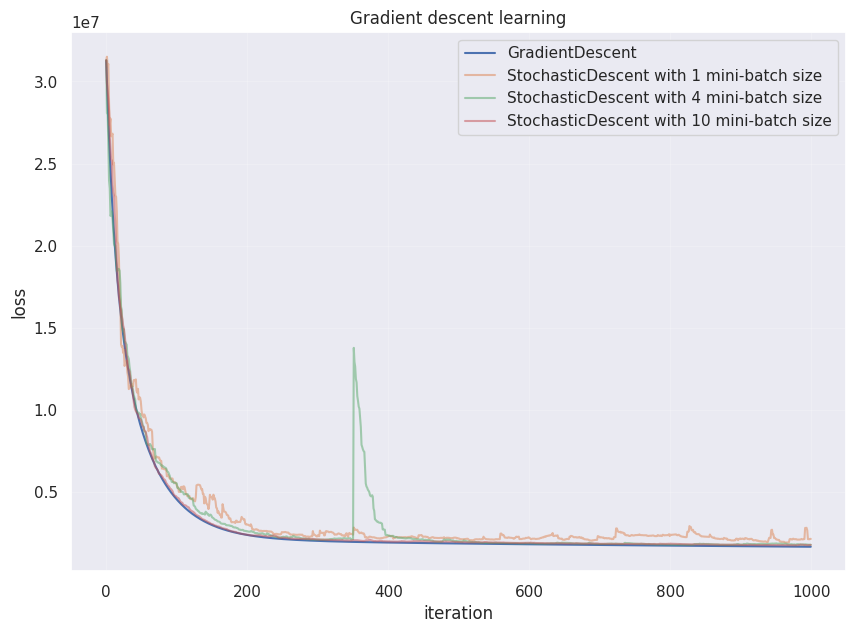

In [106]:
plt.figure(figsize=(10, 7))

plt.plot(lgd, label="GradientDescent")

n_samples = [1, 4, 10]
for ns in n_samples:
    l = LinReg(fit_intercept=True, batch_sample=ns, gd_type='StochasticDescent').fit(
        X_train_scaled,
        y_train,
        lr=5e-3,
    ).get_losses()
    
    plt.plot(l, alpha=0.5, label=f'StochasticDescent with {ns} mini-batch size')

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')

plt.legend()
plt.grid(alpha=0.2)
plt.show()

**unfortunately, the deviations**

**WELL, THAT IS, EMISSIONS**
with batch size equals 4

